<a href="https://colab.research.google.com/github/dasdasqs2/Machine-learning/blob/main/wk5_0401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = w1x1 + w2x2
x1 = 70, x2 = 1.7, 이면 x2는 y에 큰영향을 끼치지 않는다.
따라서 이것을 정규화로 0~1 사이 값으로 만들어준다.

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [26]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


# 데이터 전처리(정규화)

![data_normalization.png](https://github.com/dasdasqs2/Machine-learning/blob/main/data_normalization.png?raw=true)

- train 데이터를 정규화 => test 데이터도 정규화해야한다.
- test 데이터를 정규화 할때 train 데이터의 평균을 빼주는 이유 (test_X -= x_mean) : test 데이터는 전체 데이터가 있다고 볼 수 없다.
(표준편차도 마찬가지)

In [27]:
x_mean = train_X.mean() # 먼저 평균값을 구함(x1~x13)
x_std = train_X.std() # 표준편차 구함(x1~x13)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [28]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),#input layer에 있는 노드가 13개(x1~x13)
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse') #learning_rate=0.07, cost=mse

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_9 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                640       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 3,452
Trainable params: 3,452
Non-trainable params: 0
_________________________________________________________________


# 데이터의 역할
![data_role.png](https://github.com/dasdasqs2/Machine-learning/blob/main/data_role.png?raw=true)

In [29]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25) #validation_split : 전체 데이터 중 검증데이터를 몇 퍼센트 할 것인지

Epoch 1/25
10/10 [==============================] - 1s 21ms/step - loss: 1.4791 - val_loss: 1.1477
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.8563 - val_loss: 1.6102
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.7966 - val_loss: 1.0303
Epoch 4/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6894 - val_loss: 1.0476
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.8169 - val_loss: 1.0568
Epoch 6/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7009 - val_loss: 1.0928
Epoch 7/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6563 - val_loss: 1.0541
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4951 - val_loss: 1.0227
Epoch 9/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6302 - val_loss: 0.9616
Epoch 10/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6683 - val_loss: 1.0438
Epoch 11/25
10/10 

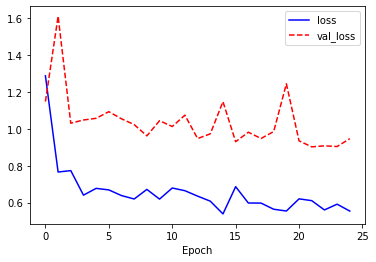

In [30]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# 학습이 잘 안된 것을 예싱

In [31]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.6436


0.6436160802841187

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


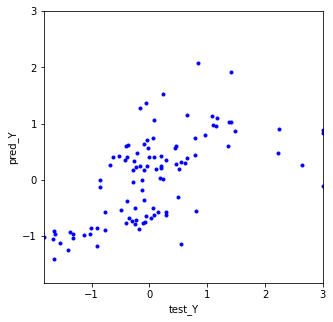

In [32]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [33]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),#input layer에 있는 특징이 13개(x1~x13) 노드는 52개
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse') #learning_rate=0.07, cost=mse

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 1s 22ms/step - loss: 7.6148 - val_loss: 1.1051
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.8158 - val_loss: 1.4096
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.7475 - val_loss: 1.3437
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7480 - val_loss: 1.0455
Epoch 5/25
10/10 [==============================] - 0s 7ms/step - loss: 0.8326 - val_loss: 1.0701
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6551 - val_loss: 1.4053
Epoch 7/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7185 - val_loss: 1.1245


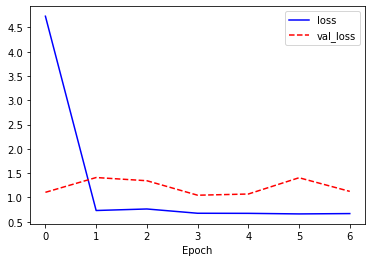

In [34]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [35]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.7206


0.7206041812896729

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


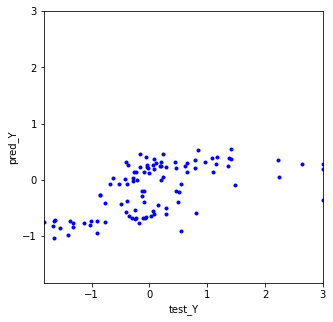

In [36]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

# 활성화 함수
- sigmoid (0~1)
- tanh (-1~0)
- relu (0~무한대)

# Logistic regression

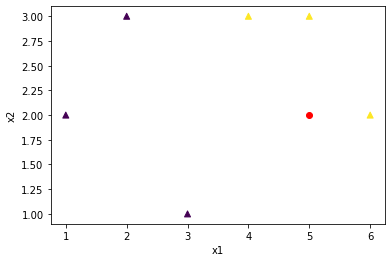

In [37]:
# Example1) Toy data
tf.random.set_seed(42)

x_train = [[1.,2.],[2.,3.],[3.,1.],[4.,3.],[5.,3.],[6.,2.]]
y_train = [[0.],[0.],[0.],[1.],[1.],[1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [38]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [39]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [47]:
def logistic_regression(features): # features : x_train
  hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) -b)) # 또는 tf.sigmoid(z)
  return hypothesis 

In [48]:
def loss_fn(hypothesis, features, labels):
  cost = -tf.reduce_mean(labels + tf.math.log(logistic_regression(features)) + (1-labels) * tf.math.log(1-hypothesis))
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [49]:
def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
  return accuracy

In [50]:
def grad(features, labels):
  with tf.GradientTape() as tape:
    loss_value = loss_fn(logistic_regression(features), features, labels)
  return tape.gradient(loss_value, [W,b])

In [51]:
# training

EPOCHS = 1001

for step in range(EPOCHS):
  for features, labels in iter(dataset):
    grads = grad(features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
    if step % 100 == 0:
      print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features), features,labels)))

Iter: 0, Loss: 1.2161
Iter: 100, Loss: 0.4235
Iter: 200, Loss: 0.3881
Iter: 300, Loss: 0.3689
Iter: 400, Loss: 0.3577
Iter: 500, Loss: 0.3503
Iter: 600, Loss: 0.3450
Iter: 700, Loss: 0.3408
Iter: 800, Loss: 0.3372
Iter: 900, Loss: 0.3339
Iter: 1000, Loss: 0.3309


In [52]:
# test

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Testset Accuracy: 1.0000
